In [27]:
import os
import math
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from lib.myfunc import FractalParser


experimental_results


,trial_count,LF/HF(rest_before),LF/HF(task),LF/HF(rest_after),answer(q1),answer(q2),answer(q3),answer(q4),answer(q5),answer(q6),image_name
0,1,1.665330,1.265538,1.587807,2,3,4,2,2,2,20191211_185222038_iOS.jpg
1,2,1.934818,1.429750,1.589041,5,5,5,5,5,4,20191211_185224526_iOS.jpg
2,3,1.242612,1.582760,1.615331,3,3,2,3,3,2,20191211_185226484_iOS.jpg
3,4,1.587081,1.201165,1.746261,5,3,2,5,5,4,20191211_185228458_iOS.jpg
4,5,1.341981,1.603083,1.460804,2,2,2,2,4,2,20191211_185230473_iOS.jpg
5,6,1.559287,1.351508,1.653283,5,5,3,5,5,3,20191211_185232325_iOS.jpg
6,7,1.530212,1.544244,1.733925,4,4,3,4,5,2,20191211_185234142_iOS.jpg
7,8,1.657821,1.384116,1.598215,5,5,4,4,4,4,20191211_185236059_iOS.jpg
8,9,1.474301,1.633734,1.466571,3,2,3,3,3,2,20191211_185237826_iOS.jpg
9,10,1.321811,1.930170,1.400278,4,3,4,4,3,3,20191211_185239544_iOS.jpg



questionnaire_details


,id,name,content
0,q1,Questionnaire 1,豊かでない- 豊かである
1,q2,Questionnaire 2,ポジティブでない - ポジティブである
2,q3,Questionnaire 3,暗い - 明るい
3,q4,Questionnaire 4,弱々しい - 力強い
4,q5,Questionnaire 5,平凡な - 独創的な
5,q6,Questionnaire 6,理性的な - 感情的な



images


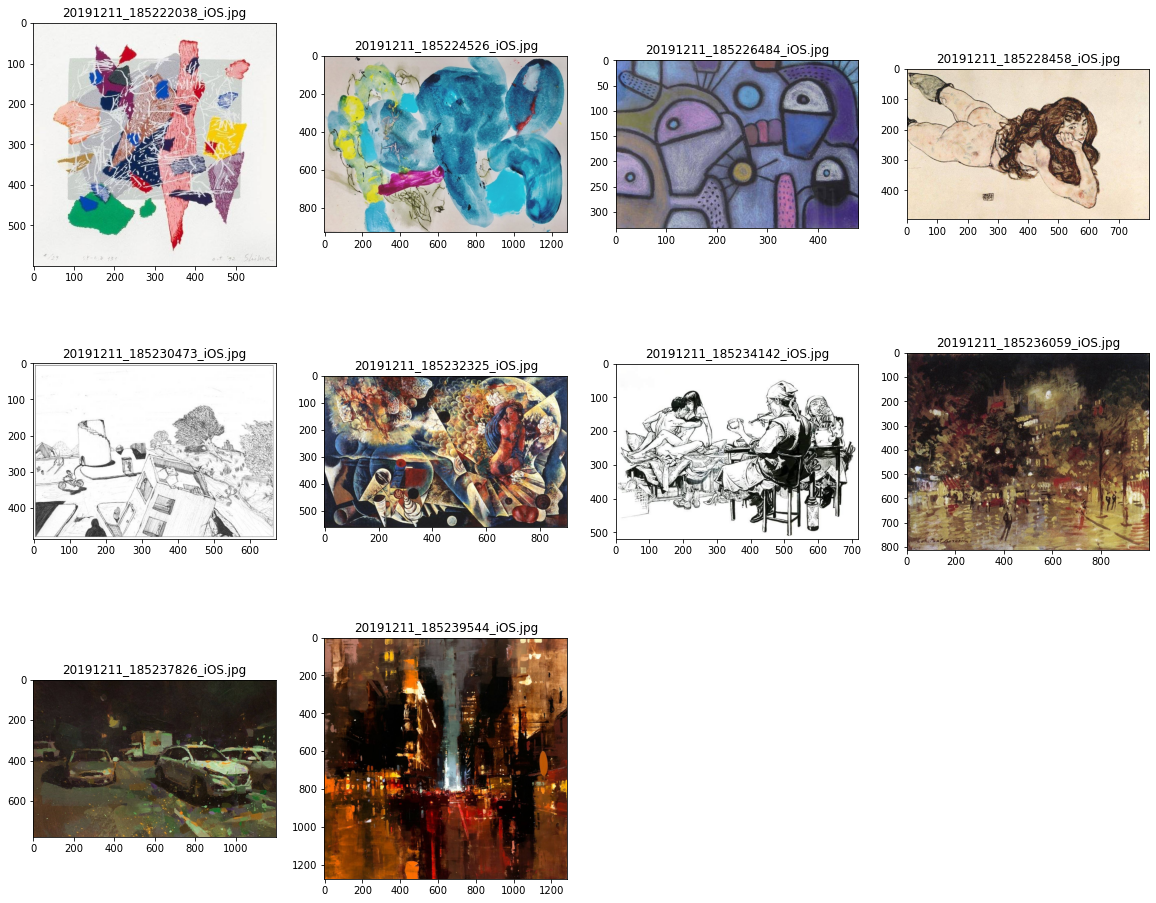

In [34]:
experimental_results_file = "../experimental_data/experimental_results.csv"
questionnaire_details_file = "../experimental_data/questionnaire_details.csv"
image_dir = "../experimental_data/images"

experimental_results = pd.read_csv(experimental_results_file, index_col=0)
print("\nexperimental_results")
display(experimental_results)

questionnaire_details = pd.read_csv(questionnaire_details_file, index_col=0)
print("\nquestionnaire_details")
display(questionnaire_details)

image_names = experimental_results["image_name"]
print("\nimages")
plt.figure(figsize=(20, 16))
num_columns = 4
num_rows = math.ceil(len(image_names)/num_columns)
for i, image_name in enumerate(image_names):
    image_file = os.path.join(image_dir, image_name)
    plt.subplot(num_rows, num_columns, i+1)
    plt.title(image_name)
    plt.imshow(plt.imread(image_file))
plt.show()

<h2>Correlation(Relationship) between Answer of Questionnaire and Value of LF/HF</h2>
<p>- For each questionnaire, ilustrate(plot) the relationship between questionnaire answer and LFHF value.</p>

In [35]:
LFHFs_task = experimental_results["LF/HF(task)"]
LFHFs_rest_before = experimental_results["LF/HF(rest_before)"]
LFHFs_diff = LFHFs_task - LFHFs_rest_before

Questionnaire 1
豊かでない- 豊かである
correlation_coefficient -> -0.40622935047124614


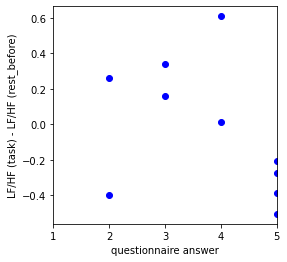

Questionnaire 2
ポジティブでない - ポジティブである
correlation_coefficient -> -0.5535691179967643


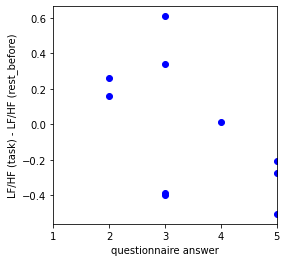

Questionnaire 3
暗い - 明るい
correlation_coefficient -> -0.3506026686839339


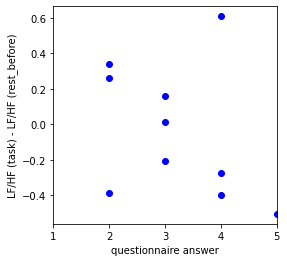

Questionnaire 4
弱々しい - 力強い
correlation_coefficient -> -0.37021540785267704


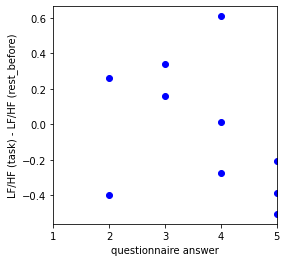

Questionnaire 5
平凡な - 独創的な
correlation_coefficient -> -0.38851200851823364


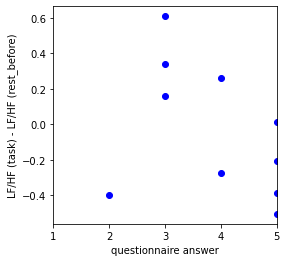

Questionnaire 6
理性的な - 感情的な
correlation_coefficient -> -0.5255295001529559


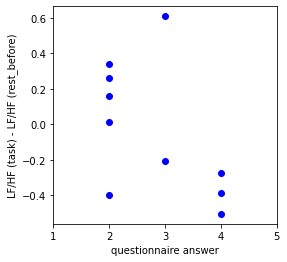

In [38]:
questionnaire_ids = ["q1", "q2", "q3", "q4", "q5", "q6"]
for questionnaire_id in questionnaire_ids:
    questionnaire = questionnaire_details.query("id == '{}'".format(questionnaire_id)).values.tolist()
    _, questionnaire_name, questionnaire_content = questionnaire[0]
    print("{}\n{}".format(questionnaire_name, questionnaire_content))
    answers = experimental_results["answer({})".format(questionnaire_id)]
    correlation_coefficient = np.corrcoef(answers, LFHFs_diff)[0][1]
    print("correlation_coefficient -> {}".format(correlation_coefficient))
    fig = plt.figure(figsize=(10, 4))
    plt.subplots_adjust(wspace = 0.5)
#     ax1 = fig.add_subplot(1, 2, 1)
#     ax1.plot(answers, LFHFs_task, 'o', color="blue")
#     ax1.set_xlabel("questionnaire answer")
#     ax1.set_ylabel("LF/HF (task)")
#     ax1.set_xlim(1, 5)
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(answers, LFHFs_diff, 'o', color="blue")
    ax2.set_xlabel("questionnaire answer")
    ax2.set_ylabel("LF/HF (task) - LF/HF (rest_before)")
    ax2.set_xlim(1, 5)
    plt.show()

<h2>Calculate Fractal Dimension using "Box Counting"<h2>

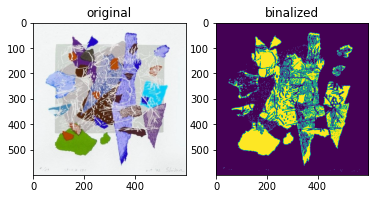

fractal_dimension -> 1.6686536418325932



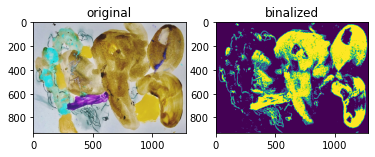

fractal_dimension -> 1.7418100070390108



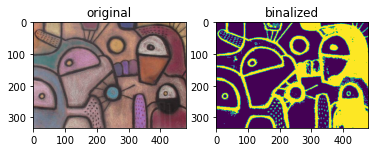

fractal_dimension -> 1.7313861513570394



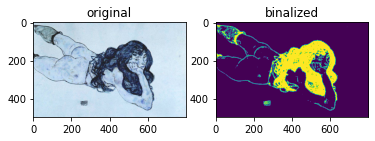

fractal_dimension -> 1.578218733229493



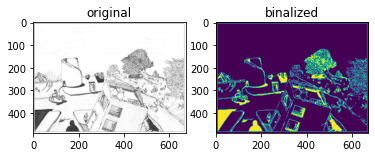

fractal_dimension -> 1.613594145719035



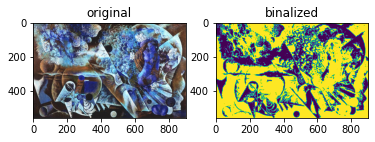

fractal_dimension -> 1.9260366176972543



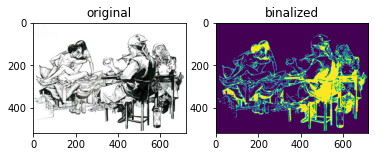

fractal_dimension -> 1.7576772572712465



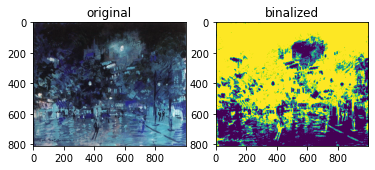

fractal_dimension -> 1.9022279943934586



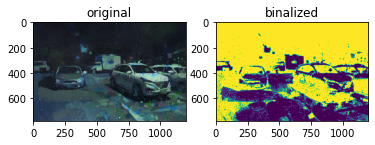

fractal_dimension -> 1.91887352097859



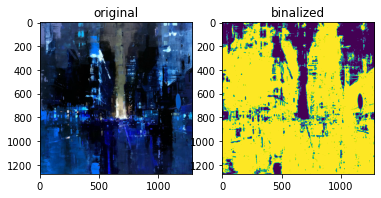

fractal_dimension -> 1.933342582460744



,image_name,fractal_dimension
0,20191211_185222038_iOS.jpg,1.668654
1,20191211_185224526_iOS.jpg,1.741810
2,20191211_185226484_iOS.jpg,1.731386
3,20191211_185228458_iOS.jpg,1.578219
4,20191211_185230473_iOS.jpg,1.613594
5,20191211_185232325_iOS.jpg,1.926037
6,20191211_185234142_iOS.jpg,1.757677
7,20191211_185236059_iOS.jpg,1.902228
8,20191211_185237826_iOS.jpg,1.918874
9,20191211_185239544_iOS.jpg,1.933343


In [39]:
fractal_parser = FractalParser()
fractal_dimensions = []
for i, image_name in enumerate(image_names):
    image_file = os.path.join(image_dir, image_name)
    fractal_dimension = fractal_parser.get_fractal_dimension(
        image_file = image_file,
        max_box_size = 100,
        min_box_size = 5,
        show_figures = True
    )
    fractal_dimensions.append([image_name, fractal_dimension])
    print("fractal_dimension -> {}\n".format(fractal_dimension))
columns = ["image_name", "fractal_dimension"]
fractal_dimensions = pd.DataFrame(fractal_dimensions, columns=columns)
display(fractal_dimensions)

<h2>Correlation between Answer of Questionnaire and Fractal Dimension</h2>
<p>- For each questionnaire, ilustrate(plot) the relationship between questionnaire answer and Fractal Dimension.</p>

<h4>Merge calculated fractal dimensions and experimental results </h4>

In [40]:
experimental_results_with_fractal = pd.merge(experimental_results, fractal_dimensions, on="image_name")
display(experimental_results_with_fractal)

,trial_count,LF/HF(rest_before),LF/HF(task),LF/HF(rest_after),answer(q1),answer(q2),answer(q3),answer(q4),answer(q5),answer(q6),image_name,fractal_dimension
0,1,1.665330,1.265538,1.587807,2,3,4,2,2,2,20191211_185222038_iOS.jpg,1.668654
1,2,1.934818,1.429750,1.589041,5,5,5,5,5,4,20191211_185224526_iOS.jpg,1.741810
2,3,1.242612,1.582760,1.615331,3,3,2,3,3,2,20191211_185226484_iOS.jpg,1.731386
3,4,1.587081,1.201165,1.746261,5,3,2,5,5,4,20191211_185228458_iOS.jpg,1.578219
4,5,1.341981,1.603083,1.460804,2,2,2,2,4,2,20191211_185230473_iOS.jpg,1.613594
5,6,1.559287,1.351508,1.653283,5,5,3,5,5,3,20191211_185232325_iOS.jpg,1.926037
6,7,1.530212,1.544244,1.733925,4,4,3,4,5,2,20191211_185234142_iOS.jpg,1.757677
7,8,1.657821,1.384116,1.598215,5,5,4,4,4,4,20191211_185236059_iOS.jpg,1.902228
8,9,1.474301,1.633734,1.466571,3,2,3,3,3,2,20191211_185237826_iOS.jpg,1.918874
9,10,1.321811,1.930170,1.400278,4,3,4,4,3,3,20191211_185239544_iOS.jpg,1.933343


<h4>Plot correlation and calculate correlation coefficient</h4>

Questionnaire 1
豊かでない- 豊かである
correlation_coefficient -> 0.32658324701164665


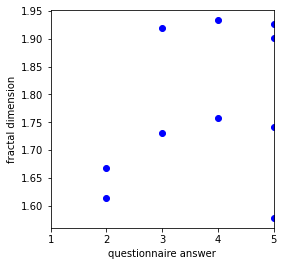

Questionnaire 2
ポジティブでない - ポジティブである
correlation_coefficient -> 0.3347476287617102


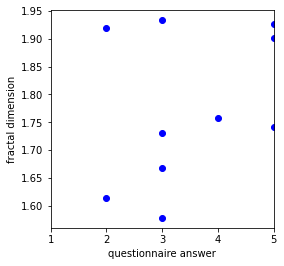

Questionnaire 3
暗い - 明るい
correlation_coefficient -> 0.4065410380530332


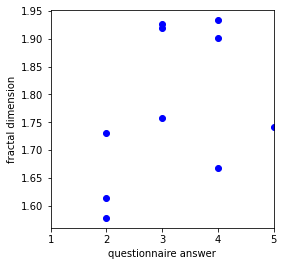

Questionnaire 4
弱々しい - 力強い
correlation_coefficient -> 0.2574972166283942


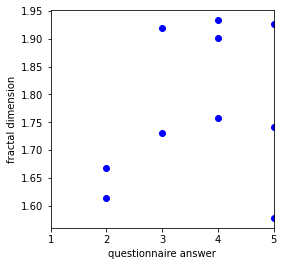

Questionnaire 5
平凡な - 独創的な
correlation_coefficient -> -0.10466424890500672


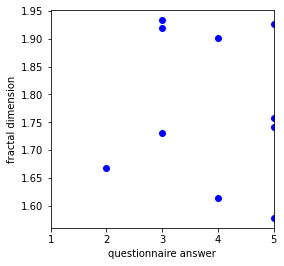

Questionnaire 6
理性的な - 感情的な
correlation_coefficient -> 0.07739611420609205


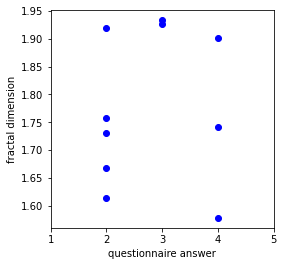

In [43]:
questionnaire_ids = ["q1", "q2", "q3", "q4", "q5", "q6"]
fractal_dimensions = experimental_results_with_fractal["fractal_dimension"]
for questionnaire_id in questionnaire_ids:
    questionnaire = questionnaire_details.query("id == '{}'".format(questionnaire_id)).values.tolist()
    _, questionnaire_name, questionnaire_content = questionnaire[0]
    print("{}\n{}".format(questionnaire_name, questionnaire_content))
    answers = experimental_results["answer({})".format(questionnaire_id)]
    correlation_coefficient = np.corrcoef(answers,fractal_dimensions)[0][1]
    print("correlation_coefficient -> {}".format(correlation_coefficient))
    fig = plt.figure(figsize=(10, 4))
    plt.subplots_adjust(wspace = 0.5)
    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(answers, fractal_dimensions, 'o', color="blue")
    ax2.set_xlabel("questionnaire answer")
    ax2.set_ylabel("fractal dimension")
    ax2.set_xlim(1, 5)
    plt.show()

<h2>Correlation between Variation of LF/HF value and Fractal Dimension</h2>
<p>- For each questionnaire, ilustrate(plot) the relationship between variation of LF/HF value and Fractal Dimension.</p>

correlation_coefficient -> 0.2916643257888338


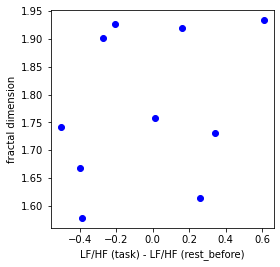

In [44]:
fractal_dimensions = experimental_results_with_fractal["fractal_dimension"]
correlation_coefficient = np.corrcoef(LFHFs_diff,fractal_dimensions)[0][1]
print("correlation_coefficient -> {}".format(correlation_coefficient))
fig = plt.figure(figsize=(10, 4))
plt.subplots_adjust(wspace = 0.5)
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(LFHFs_diff, fractal_dimensions, 'o', color="blue")
ax2.set_xlabel("LF/HF (task) - LF/HF (rest_before)")
ax2.set_ylabel("fractal dimension")
plt.show()

<h3>Check whether calculated value and theoretical value match</h3>

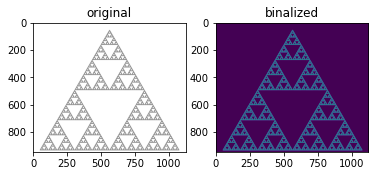

fractal_dimension
calculated value -> 1.5418974205391116
theoretical_value -> 1.585


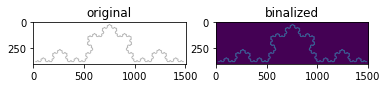

fractal_dimension
calculated value -> 1.294298810506529
theoretical_value -> 1.2619


In [45]:
validation_data_list = [
    {
        "image_file": "./lib/sierpinski.png",
        "theoretical_value": 1.5850
    }, 
    {
        "image_file": "./lib/koch.png",
        "theoretical_value": 1.2619
    }
]
for validation_data in validation_data_list:
    image_file = validation_data["image_file"]
    fractal_dimension = fractal_parser.get_fractal_dimension(
        image_file = image_file,
        max_box_size = 100,
        min_box_size = 5,
        show_figures = True
    )
    print("fractal_dimension\ncalculated value -> {}\ntheoretical_value -> {}".format(fractal_dimension, validation_data["theoretical_value"]))

(600, 600, 3)


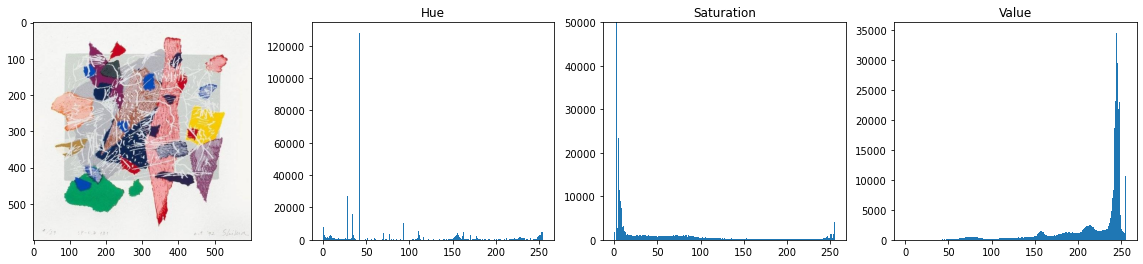

(930, 1280, 3)


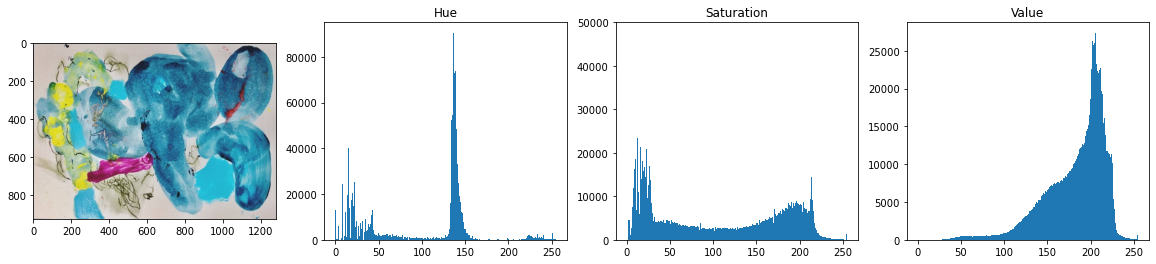

(333, 480, 3)


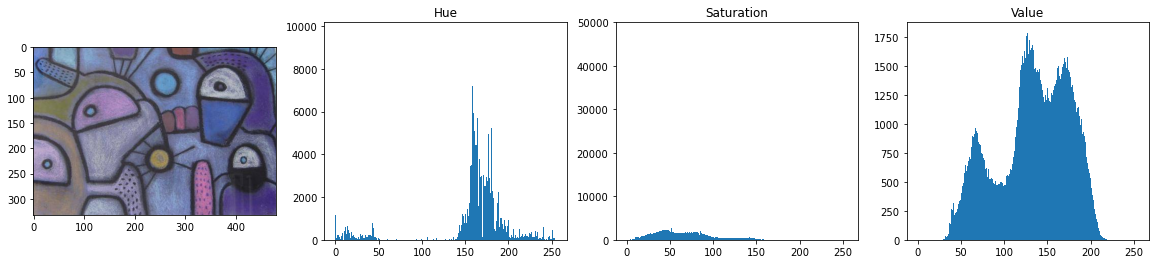

(496, 800, 3)


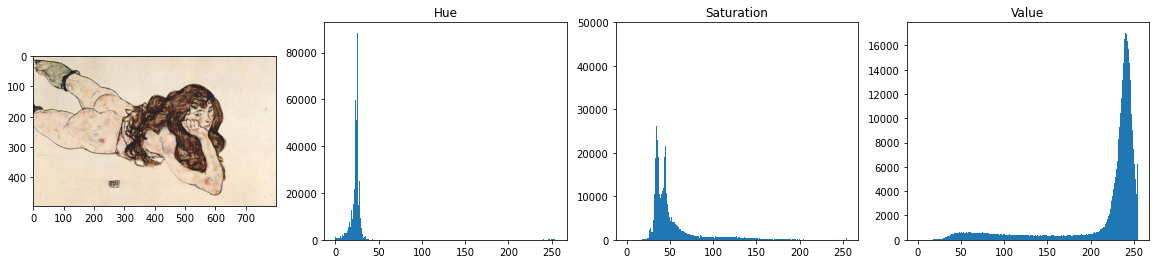

(488, 673, 3)


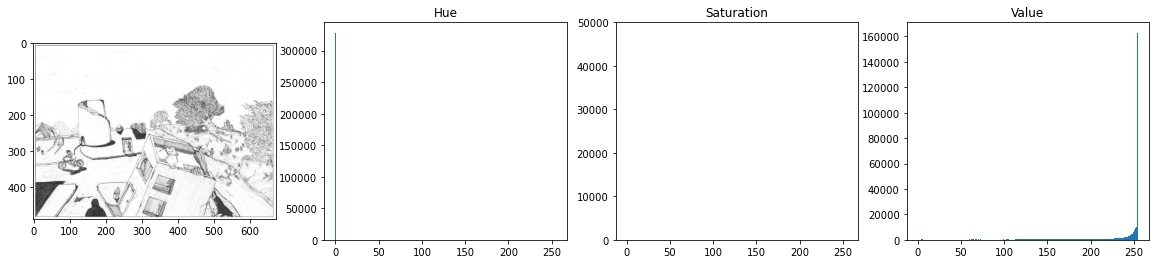

(560, 900, 3)


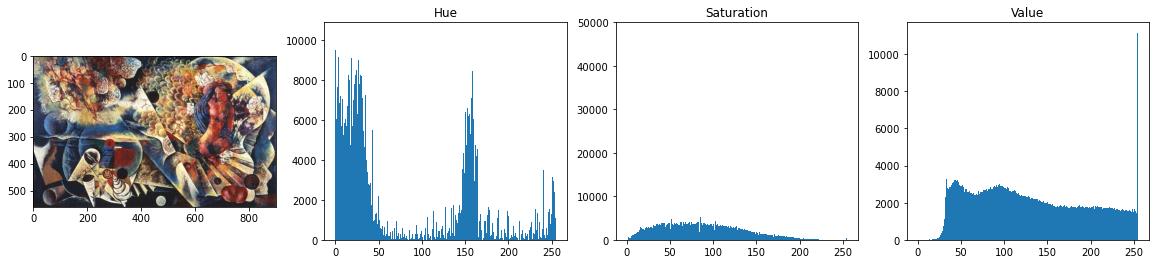

(520, 720, 3)


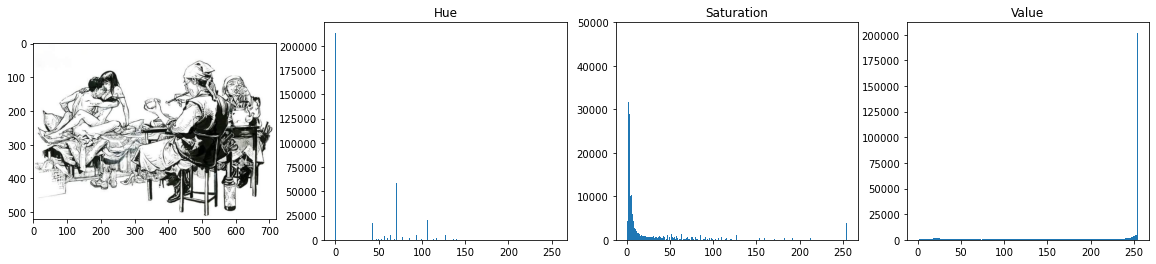

(811, 1000, 3)


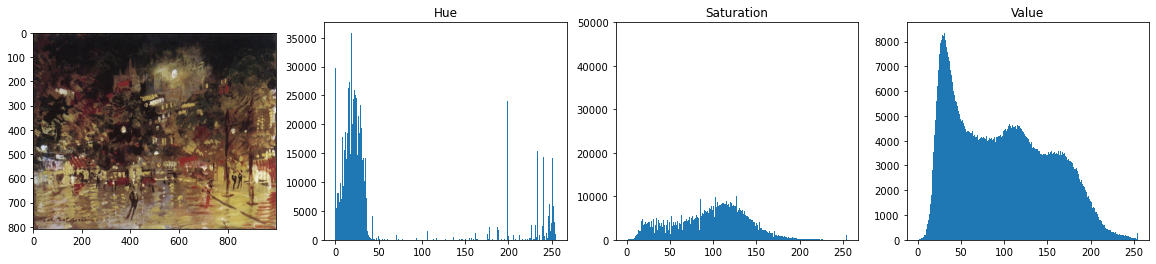

(777, 1200, 3)


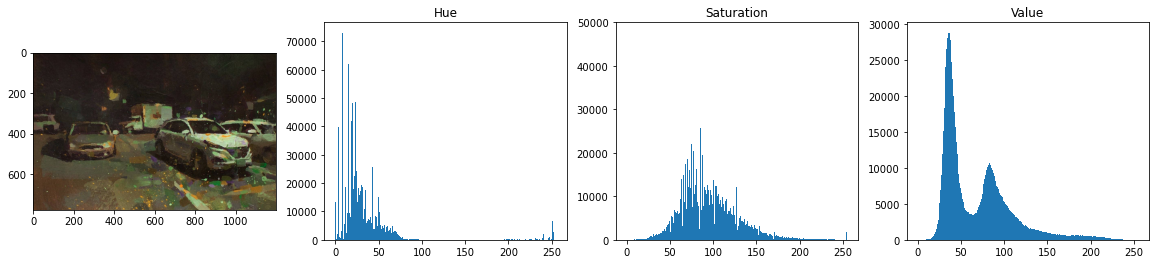

(1276, 1283, 3)


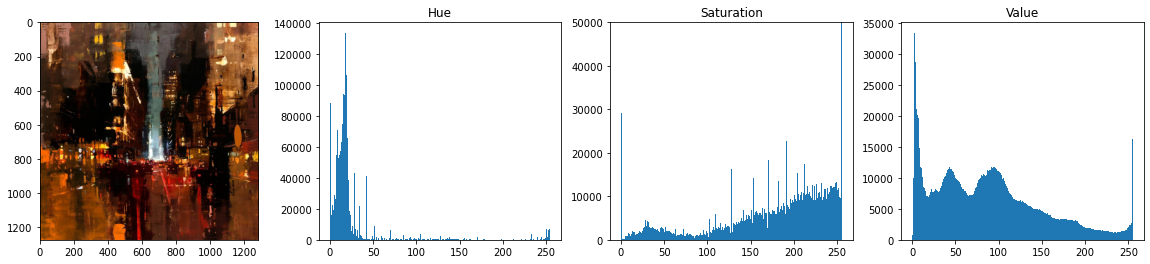

In [49]:
for i, image_name in enumerate(image_names):
    image_file = os.path.join(image_dir, image_name)
    image = Image.open(image_file)
    image_array = np.array(image)
    image_hsv = image.convert("HSV")
    image_hsv_array = np.array(image_hsv)
    print(image_hsv_array.shape)
    fig = plt.figure(figsize=(20, 4))
    ax1 = fig.add_subplot(1, 4, 1)
    ax1.imshow(image_array)
    ax2 = fig.add_subplot(1, 4, 2)
    ax2.hist(image_hsv_array[:, :, 0].flatten(), bins=np.arange(256))
    ax2.set_title("Hue")
    ax3 = fig.add_subplot(1, 4, 3)
    ax3.hist(image_hsv_array[:, :, 1].flatten(), bins=np.arange(256))
    ax3.set_title("Saturation")
    ax3.set_ylim(0, 50000)
    ax4 = fig.add_subplot(1, 4, 4)
    ax4.hist(image_hsv_array[:, :, 2].flatten(), bins=np.arange(256))
    ax4.set_title("Value")
    plt.show()